<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/netflix .csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
mode_director = df.groupby(['country','listed_in'])['director'].agg(lambda x:x.mode()[0] if not x.mode().empty else None)

df['director'] = df.apply(lambda row: mode_director.loc[(row['country'], row['listed_in'])] if pd.isnull(row['director']) else row['director'], axis =1)

KeyError: (nan, 'Docuseries, Reality TV')

In [9]:
import pandas as pd

# Assuming df is your dataframe
mode_director = df.groupby(['country','listed_in'])['director'].agg(lambda x:x.mode()[0] if not x.mode().empty else None)

# Fill NaN values in 'country' with a placeholder before calculating the mode
df['country'] = df['country'].fillna('Unknown')

# Recalculate the mode_director with the filled 'country' column
mode_director = df.groupby(['country','listed_in'])['director'].agg(lambda x:x.mode()[0] if not x.mode().empty else None)

df['director'] = df.apply(lambda row: mode_director.loc[(row['country'], row['listed_in'])] if pd.isnull(row['director']) else row['director'], axis =1)


In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,825
country,0
date_added,10
release_year,0
rating,4
duration,3


In [12]:
# Step 1: Group by 'country' and 'listed_in' to get the most frequent director
mode_director = df.groupby(['country', 'listed_in'])['director'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Apply the fill logic to the 'director' column based on the most frequent director in the respective group
df['director'] = df.apply(
    lambda row: mode_director.loc[(row['country'], row['listed_in'])]
    if pd.isnull(row['director']) and (row['country'], row['listed_in']) in mode_director.index
    else row['director'],
    axis=1
)

# Step 3: For any remaining missing values, fill with the global mode of the 'director' column
df['director'].fillna(df['director'].mode()[0], inplace=True)



Missing director values after filling: 0


<ipython-input-12-2181d0c4c7ed>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna(df['director'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,825
country,0
date_added,10
release_year,0
rating,4
duration,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
for i in df.select_dtypes(include= ['object'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)

<ipython-input-16-fb8481396e1a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for i in df.select_dtypes(include= ['object'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)


In [17]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [18]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michael Simon,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Michael Simon,David Attenborough,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Michael Simon,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Michael Simon,David Attenborough,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [20]:
#How many Movies & TV Shows are in the dataset?

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [21]:
type_counts = df.groupby('type')['type'].count()
type_counts

,type
type,
Movie,6131
TV Show,2676


In [22]:
type_counts = df.groupby('type')['type'].count().reset_index(name = 'count')
type_counts

,type,count
0,Movie,6131
1,TV Show,2676


#univariate

###Release Year Trends:

A histogram of release years shows that Netflix's content library has rapidly expanded in recent years. The majority of titles were added between 2010 and 2020, with a significant rise starting around 2015. this indicates Netflix's aggressive push in producing or acquiring new content during the streaming boom.

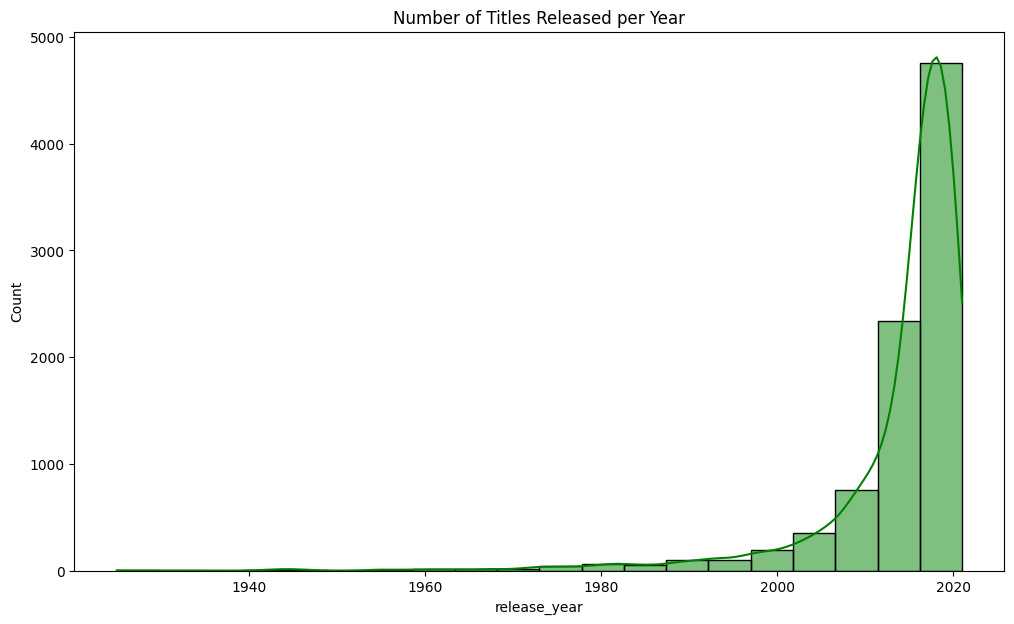

In [30]:
plt.figure(figsize=(12,7))
sns.histplot(data = df, x = 'release_year', kde=True, bins = 20, color = 'green')
plt.title('Number of Titles Released per Year')
plt.show()


###Netflix Content By Type:

Anylising entire Netflix dataset consisting of both movies and shows. Lets compare the totals no. of movies and shows in this dataste to knwo which one is the majority.

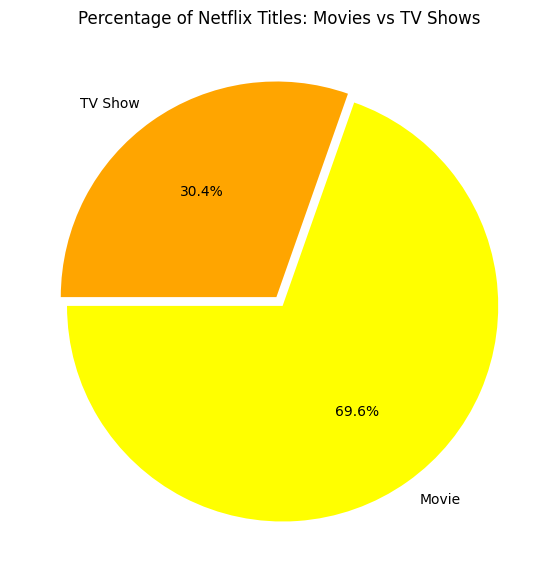

In [34]:
plt.figure(figsize=(12,7))
plt.title("Percentage of Netflix Titles: Movies vs TV Shows")
graph = plt.pie(df.type.value_counts(), explode= (0.025, 0.025),
                labels = df.type.value_counts().index, colors = ['yellow','orange'], autopct = '%1.1f%%',
                startangle = 180)

###Rating Distribution

The count plot show cases the distribution of ratings, with 'TV-MA' having the highest count at around 3200, followed by 'TV-14' with approximately 220 counts.

This reveals that the majority of the content is rated 'TV-MA', indicating a mature audience target. 'TV-14' and 'TV-PG' also have significant representation. suggesting a diverse range of content suitable for different age groups.

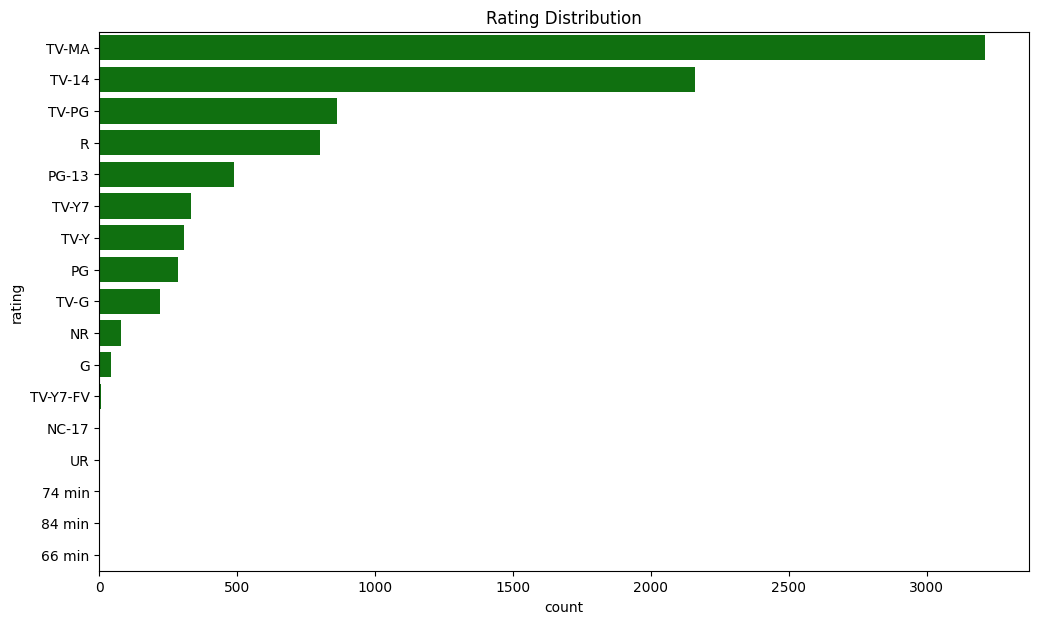

In [40]:
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'rating', data = df, order = df['rating'].value_counts().index, color = 'green')
plt.title('Rating Distribution')
#add_data_labels(ax, type = 'bar')
plt.show()

#Bivariate Analysis


Moving on to bivariate analysis, we'll now explore relationship between pairs of variables with our netflix dataset. With focus on understanding how different attributes interact with each other

###Top 15 Countries by Show Type

Text(0.5, 1.0, 'Top 15 Countries by Type of Shows')

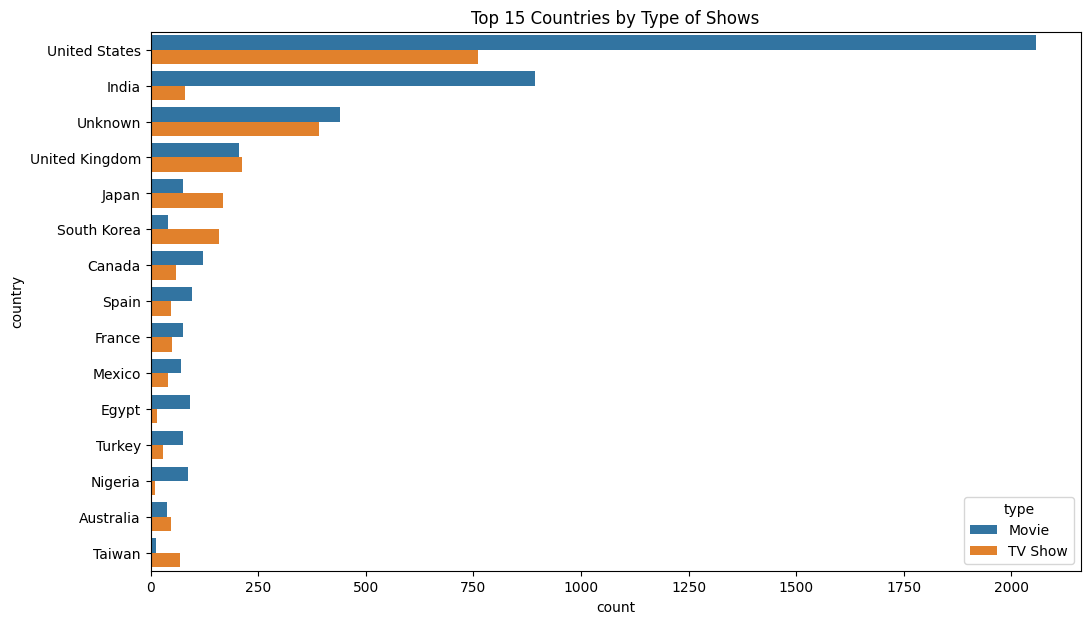

In [41]:
# Generate clustered bar chart
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'country', hue = 'type', data = df, order =
                   df['country'].value_counts().index[:15])
plt.title('Top 15 Countries by Type of Shows')

The analysis unveils the distribution of content types (movies vs TV shows) across different countries. Notably, the United States stands out with over 2000 movies and approximately 750 TV shows, showcasing a diverse range of content offerings. In contrast, India boasts nearly 900 movies but only around 80 TV shows, indicating a preference for movies over TV content in the region.
Similarly, UK exhibits a nearly equal distribution, with roughly 200 movies and approximately 210 TV shows. These findings underscore the importance of understanding regional preferences and can significantly inform acquisition strategies tailored to specific markets

In [48]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michael Simon,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Michael Simon,David Attenborough,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Michael Simon,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Distribution of movie duration

In [ ]:
#filter the dataframe to only include movies
df_movies = df[df['type'] == 'Movie']

df_shows = df[df['type'] == 'TV show']

# for movies extract duration in mins

df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# for tv shows extract numeric value in seasons
df_shows['seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14,6))


#plot for movies

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'type', y = 'duration_minutes', palette='Set2')

#title and labels
plt.title('Duration Distribution for Movies (Minutes)')




<ipython-input-52-40c3208b5546>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')


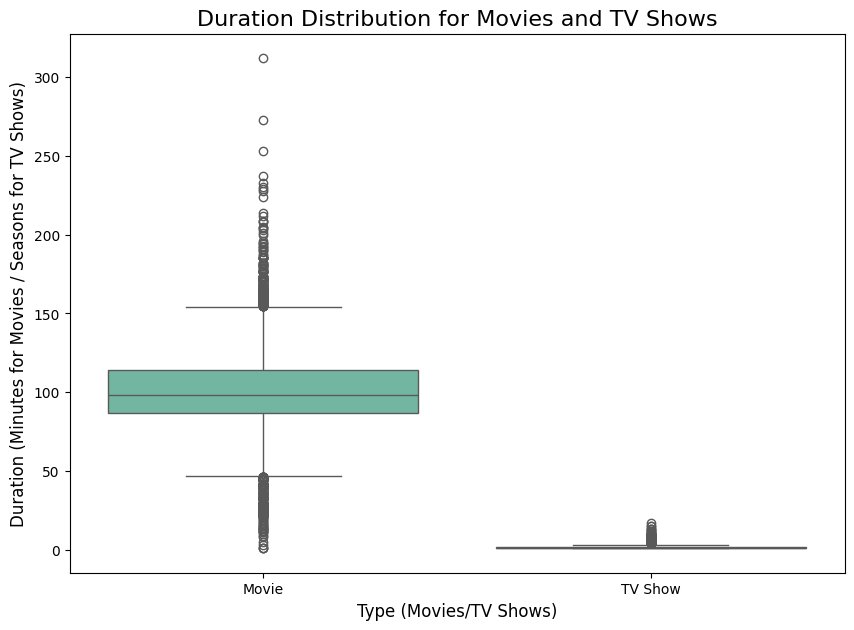

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the duration column
# Extract numeric values for Movies (duration in minutes) and TV Shows (number of seasons)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Step 2: Plot the boxplot for Movies and TV Shows
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')

# Add title and labels
plt.title('Duration Distribution for Movies and TV Shows', fontsize=16)
plt.xlabel('Type (Movies/TV Shows)', fontsize=12)
plt.ylabel('Duration (Minutes for Movies / Seasons for TV Shows)', fontsize=12)
plt.show()
